In [195]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


current_path = '/Users/ericklopez/Desktop/Developing_and_Deploying_a_Predictive_Analytics_Platform_Using_FastAPI_Streamlit_and_Docker/empirical/notebooks/data_visualizations.ipynb'
sys.path.insert(0, os.path.dirname(os.path.dirname(current_path)))


In [196]:
fpath = os.path.join(os.path.abspath('..'), 'data', 'processed', 'cleaned_car_data.csv')
df = pd.read_csv(fpath)
df_copy = df.copy()

In [197]:
df_copy.head()

,Unnamed: 0,name,year,fuel_type,automaker,miles_driven,price
0,0,Hyundai Santro Xing,2007,Petrol,Hyundai,27962,952
1,1,Mahindra Jeep CL550,2006,Diesel,Mahindra,25,5059
2,2,Maruti Suzuki Alto,2018,Petrol,Maruti,13670,0
3,3,Hyundai Grand i10,2014,Petrol,Hyundai,17398,3869
4,4,Ford EcoSport Titanium,2014,Diesel,Ford,22369,6845


In [198]:
col = ['Unnamed: 0']
df_copy.drop(columns=col, inplace = True)

In [199]:
values_to_drop = [0]
df_filtered = df_copy[~df_copy['price'].isin(values_to_drop)]

values_to_drop2 = [0]
df_filtered = df_filtered[~df_filtered['miles_driven'].isin(values_to_drop2)]

values_to_drop3 = ['Mahindra', 'Maruti', 'Skoda', 'Renault', 'Datsun', 'Tata', 'Hindustan', 'Force', 'Land', 'Volvo']
df_filtered = df_filtered[~df_filtered['automaker'].isin(values_to_drop3)]

/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/2029307351.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')


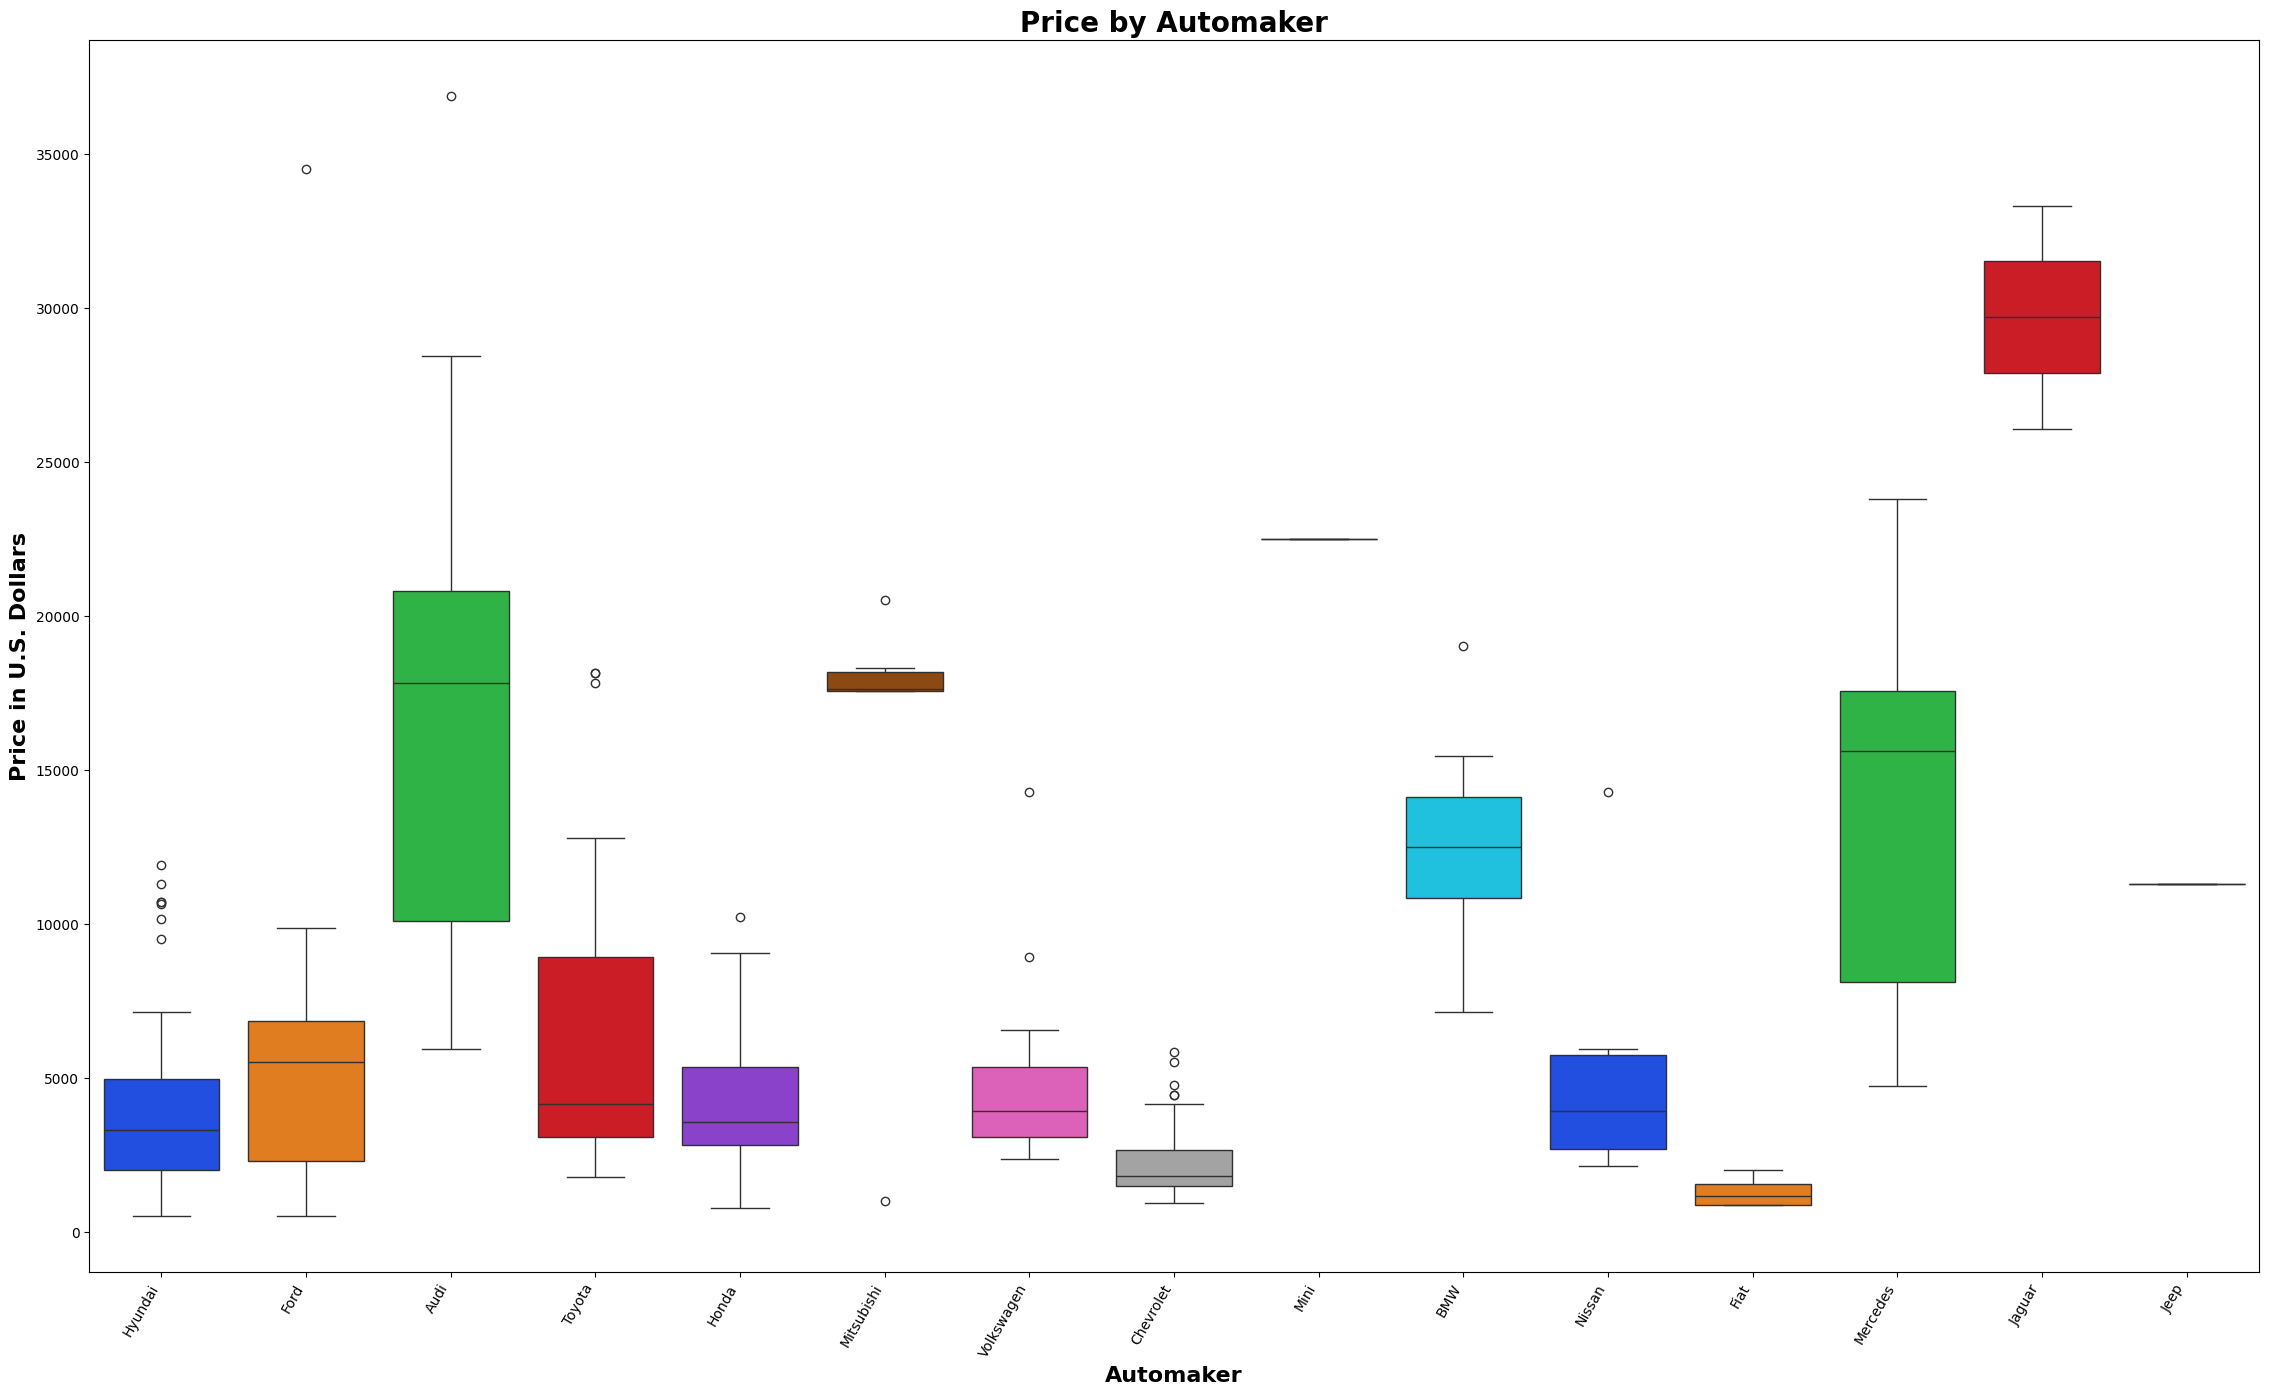

In [200]:
plt.subplots(figsize=(28,16))

ax=sns.boxplot(x='automaker', y='price', data=df_filtered, hue ='automaker', palette = 'bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')

#titles
ax.set_title('Price by Automaker', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Automaker', fontsize=16, weight= 'bold')
plt.show()

Filter out the outliers


In [201]:
# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = df_filtered['Price_converted'].quantile(0.25)
# Q3 = df_filtered['Price_converted'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for filtering outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# df_price_converted_no_outliers = df_filtered[(df_filtered['Price_converted'] >= lower_bound) & 
#                                       (df_filtered['Price_converted'] <= upper_bound)]

/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/3341490331.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')


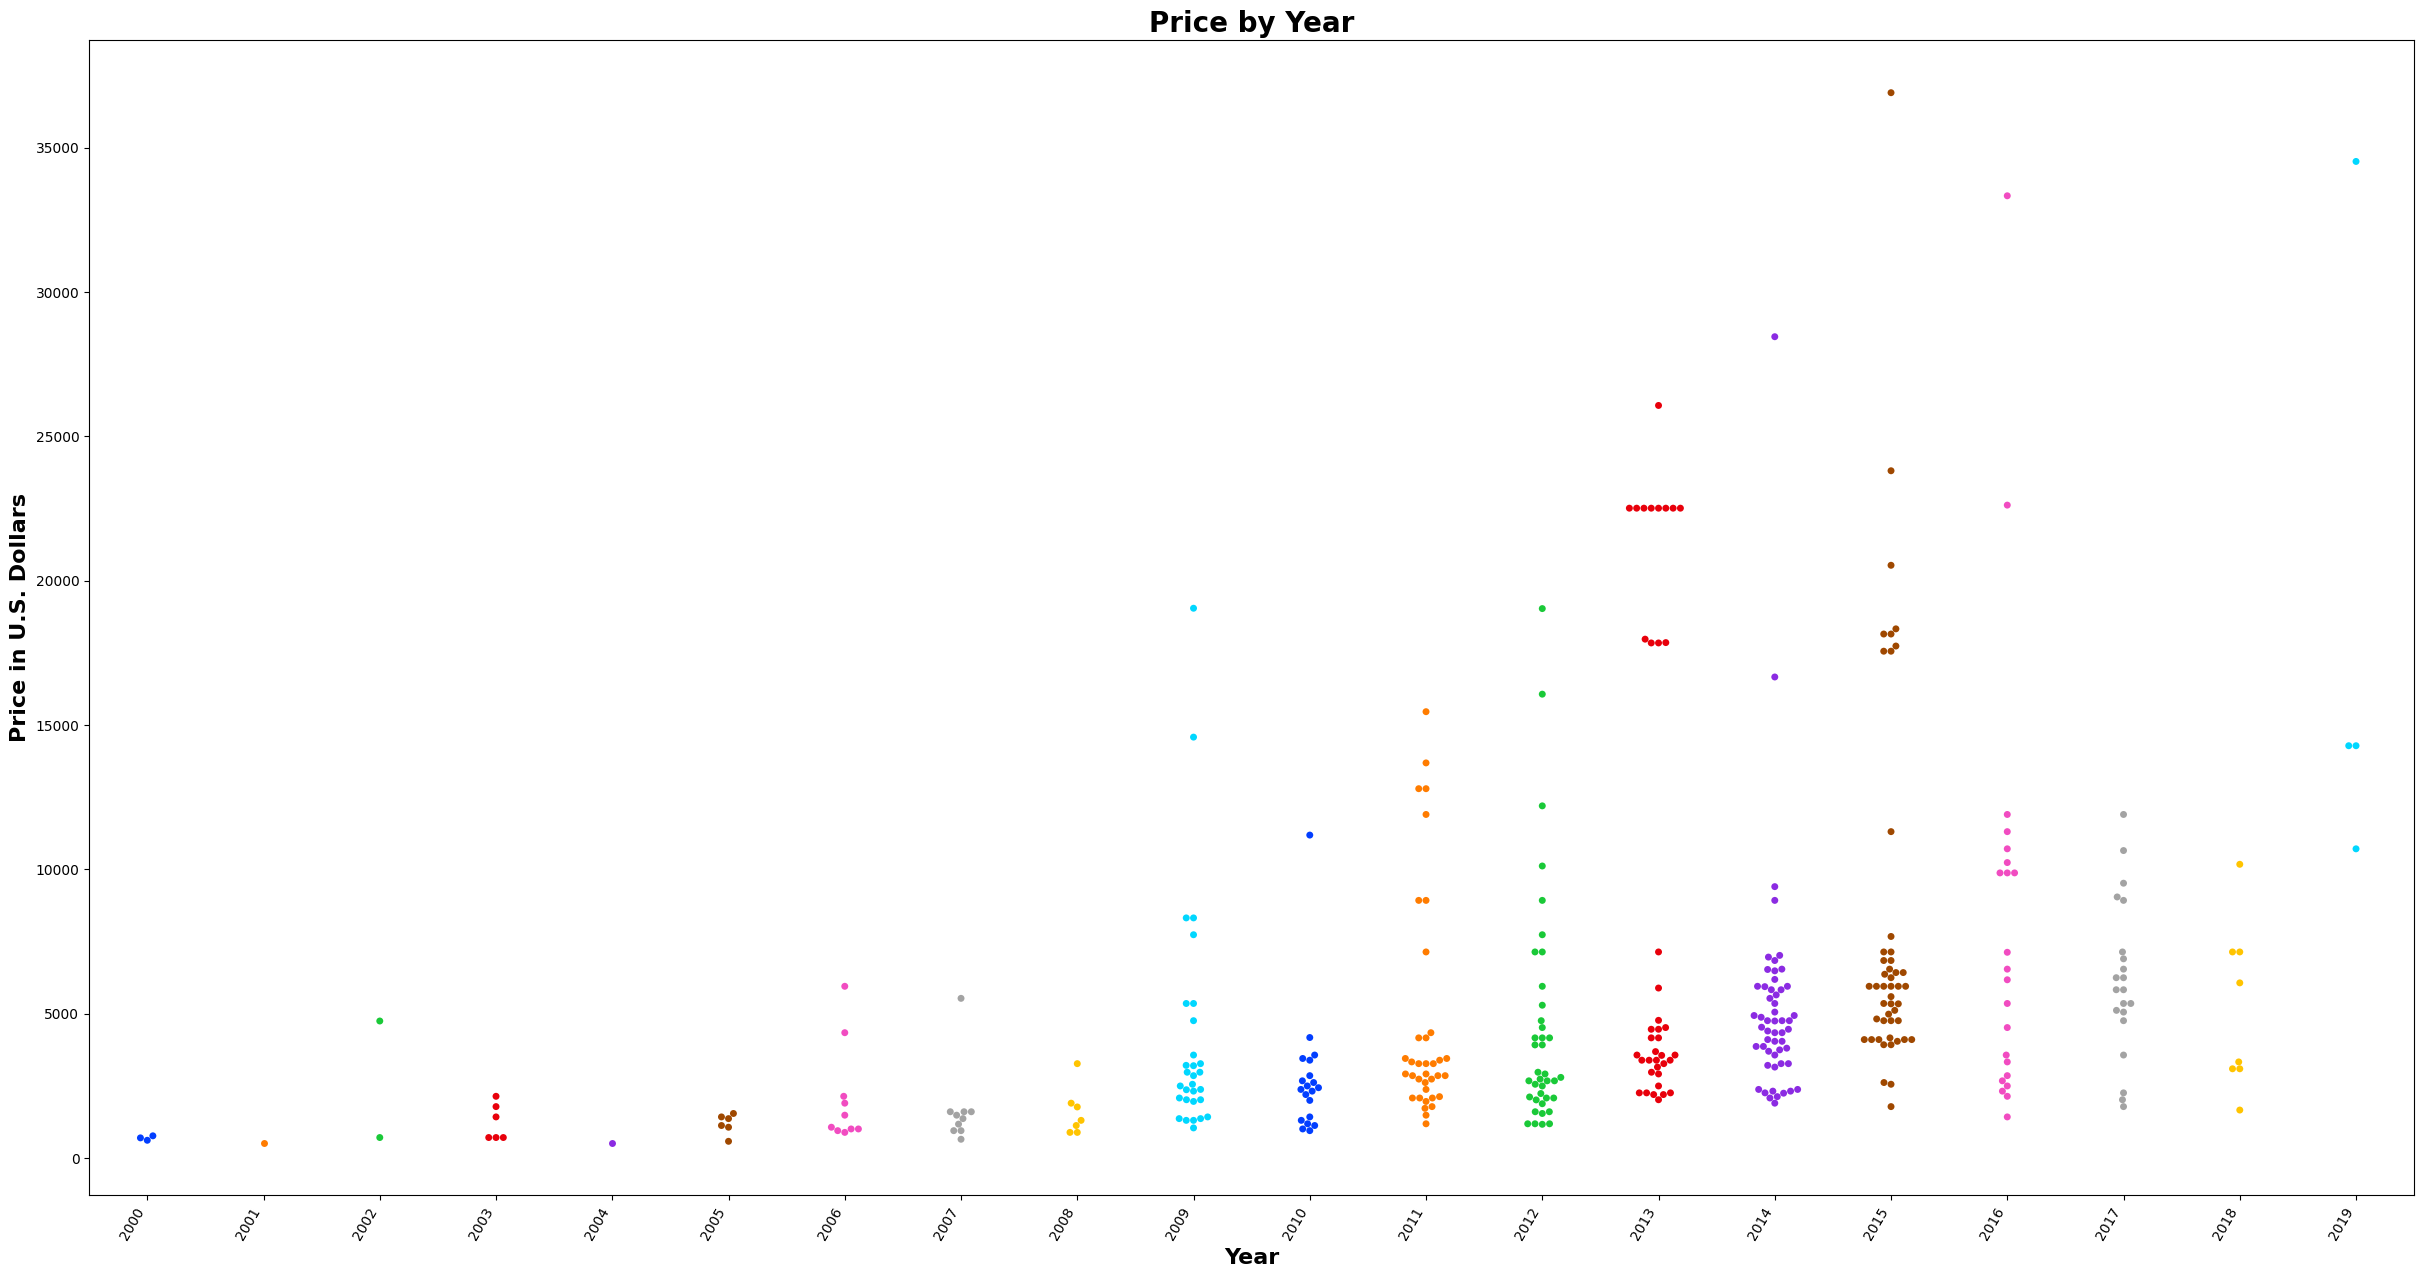

In [202]:
plt.subplots(figsize=(30,15))

ax=sns.swarmplot(x='year', y='price', data=df_filtered, hue ='year', palette = 'bright', legend = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')

#titles
ax.set_title('Price by Year', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Year', fontsize=16, weight= 'bold')
plt.show()


In [203]:
#average price df
average_price_df = df_filtered.groupby('automaker').agg(
    average_price=('price', 'mean'),
).reset_index()

average_price_df.head()

,automaker,average_price
0,Audi,17581.818182
1,BMW,12498.000000
2,Chevrolet,2405.294118
3,Fiat,1307.250000
4,Ford,5692.793103


In [204]:
#average price YOY df
average_price_YOY_df = df_filtered.groupby(['year']).agg(
    average_price=('price', 'mean')
).reset_index()

average_price_YOY_df.head()

,year,average_price
0,2000,698.0
1,2001,535.0
2,2002,2732.0
3,2003,1249.5
4,2004,535.0


In [205]:
#average miles YOY df
average_miles_YOY_df = df_filtered.groupby('year').agg(
    average_price=('price', 'mean'),
    average_miles=('miles_driven', 'mean')
).reset_index()

average_miles_YOY_df.head()

,year,average_price,average_miles
0,2000,698.0,46489.000000
1,2001,535.0,40389.000000
2,2002,2732.0,27340.000000
3,2003,1249.5,43599.666667
4,2004,535.0,85435.000000


In [206]:
#average miles df
average_miles_df = df_filtered.groupby('automaker').agg(
    average_price=('price', 'mean'),
    average_miles=('miles_driven', 'mean')
).reset_index()

average_miles_df.head()

,automaker,average_price,average_miles
0,Audi,17581.818182,18129.818182
1,BMW,12498.000000,28273.875000
2,Chevrolet,2405.294118,29945.382353
3,Fiat,1307.250000,35915.250000
4,Ford,5692.793103,27024.103448


/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/3347026943.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')


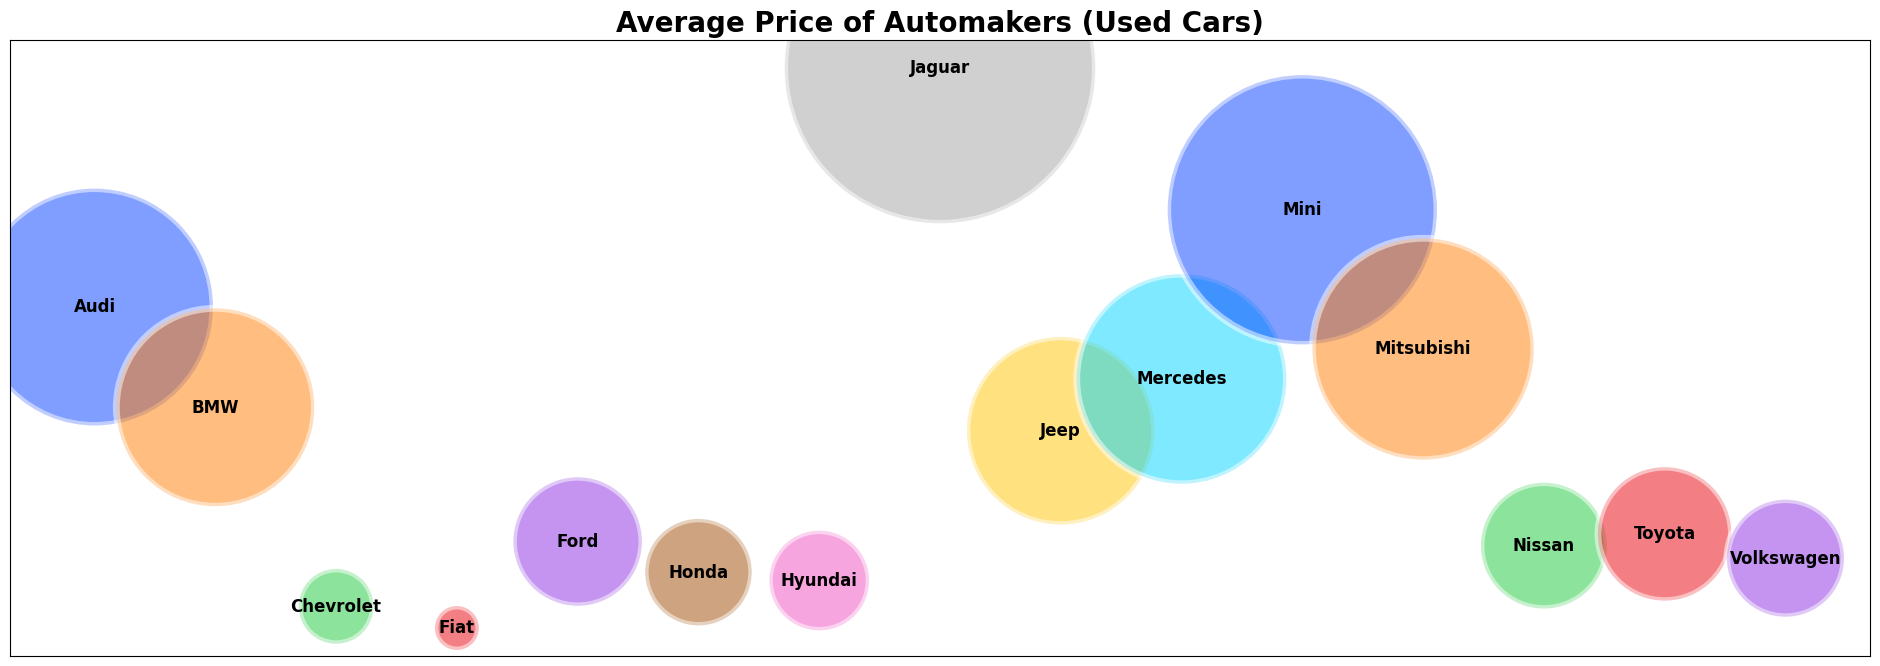

In [207]:
# Create a bubble chart
plt.figure(figsize=(24,8))
ax = sns.scatterplot(data=average_price_df, 
                     x='automaker', 
                     y='average_price', 
                     hue ='automaker', 
                     palette = 'bright', 
                     size=average_price_df['average_price'], 
                     sizes=(1000, 50000),  #(smallestArea, largestArea)
                     legend= False, 
                     alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')

# Add labels and title
plt.xlabel('Automaker', fontsize=16, weight= 'bold')
plt.ylabel('Average Price', fontsize=16, weight= 'bold')
plt.title('Average Price of Automakers (Used Cars)', fontsize=20, weight= 'bold')

# Annotate bubbles with the automaker names
for index, row in average_price_df.iterrows():
    ax.text(
        x=row['automaker'],
        y=row['average_price'],
        s=row['automaker'],
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        weight='semibold'
    )

# Remove x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()

/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/1364042686.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')


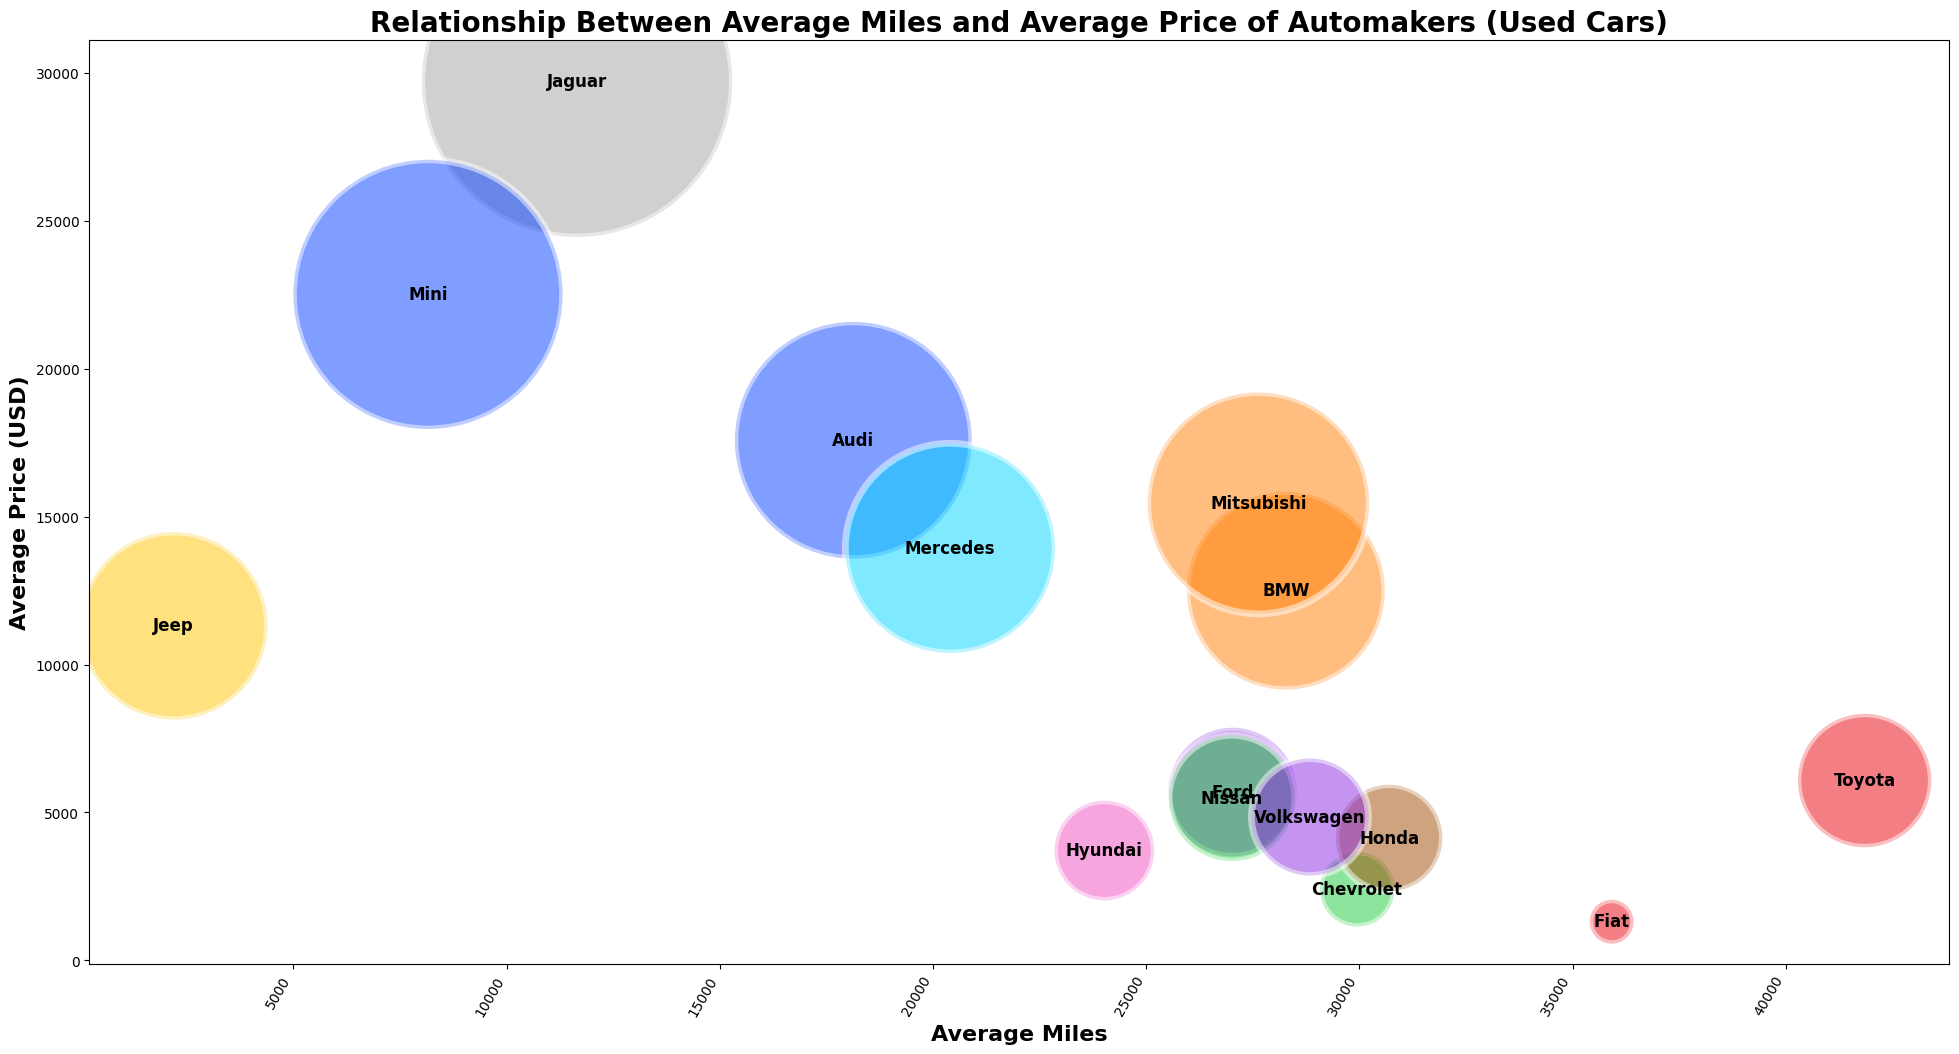

In [208]:
# Create a bubble chart
plt.figure(figsize=(24,12))
ax = sns.scatterplot(data=average_miles_df, 
                     x='average_miles', 
                     y='average_price', 
                     hue ='automaker', 
                     palette = 'bright', 
                     size=average_miles_df['average_price'], 
                     sizes=(1000, 50000),  #(smallestArea, largestArea)
                     legend= False, 
                     alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')

# Add labels and title
plt.xlabel('Average Miles', fontsize=16, weight= 'bold')
plt.ylabel('Average Price (USD)', fontsize=16, weight= 'bold')
plt.title('Relationship Between Average Miles and Average Price of Automakers (Used Cars)', fontsize=20, weight= 'bold')

# Annotate bubbles with the automaker names
for index, row in average_miles_df.iterrows():
    ax.text(
        x=row['average_miles'],
        y=row['average_price'],
        s=row['automaker'],
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        weight='semibold'
    )

# Remove x and y axes
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.gca().axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()

/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/1902442536.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')


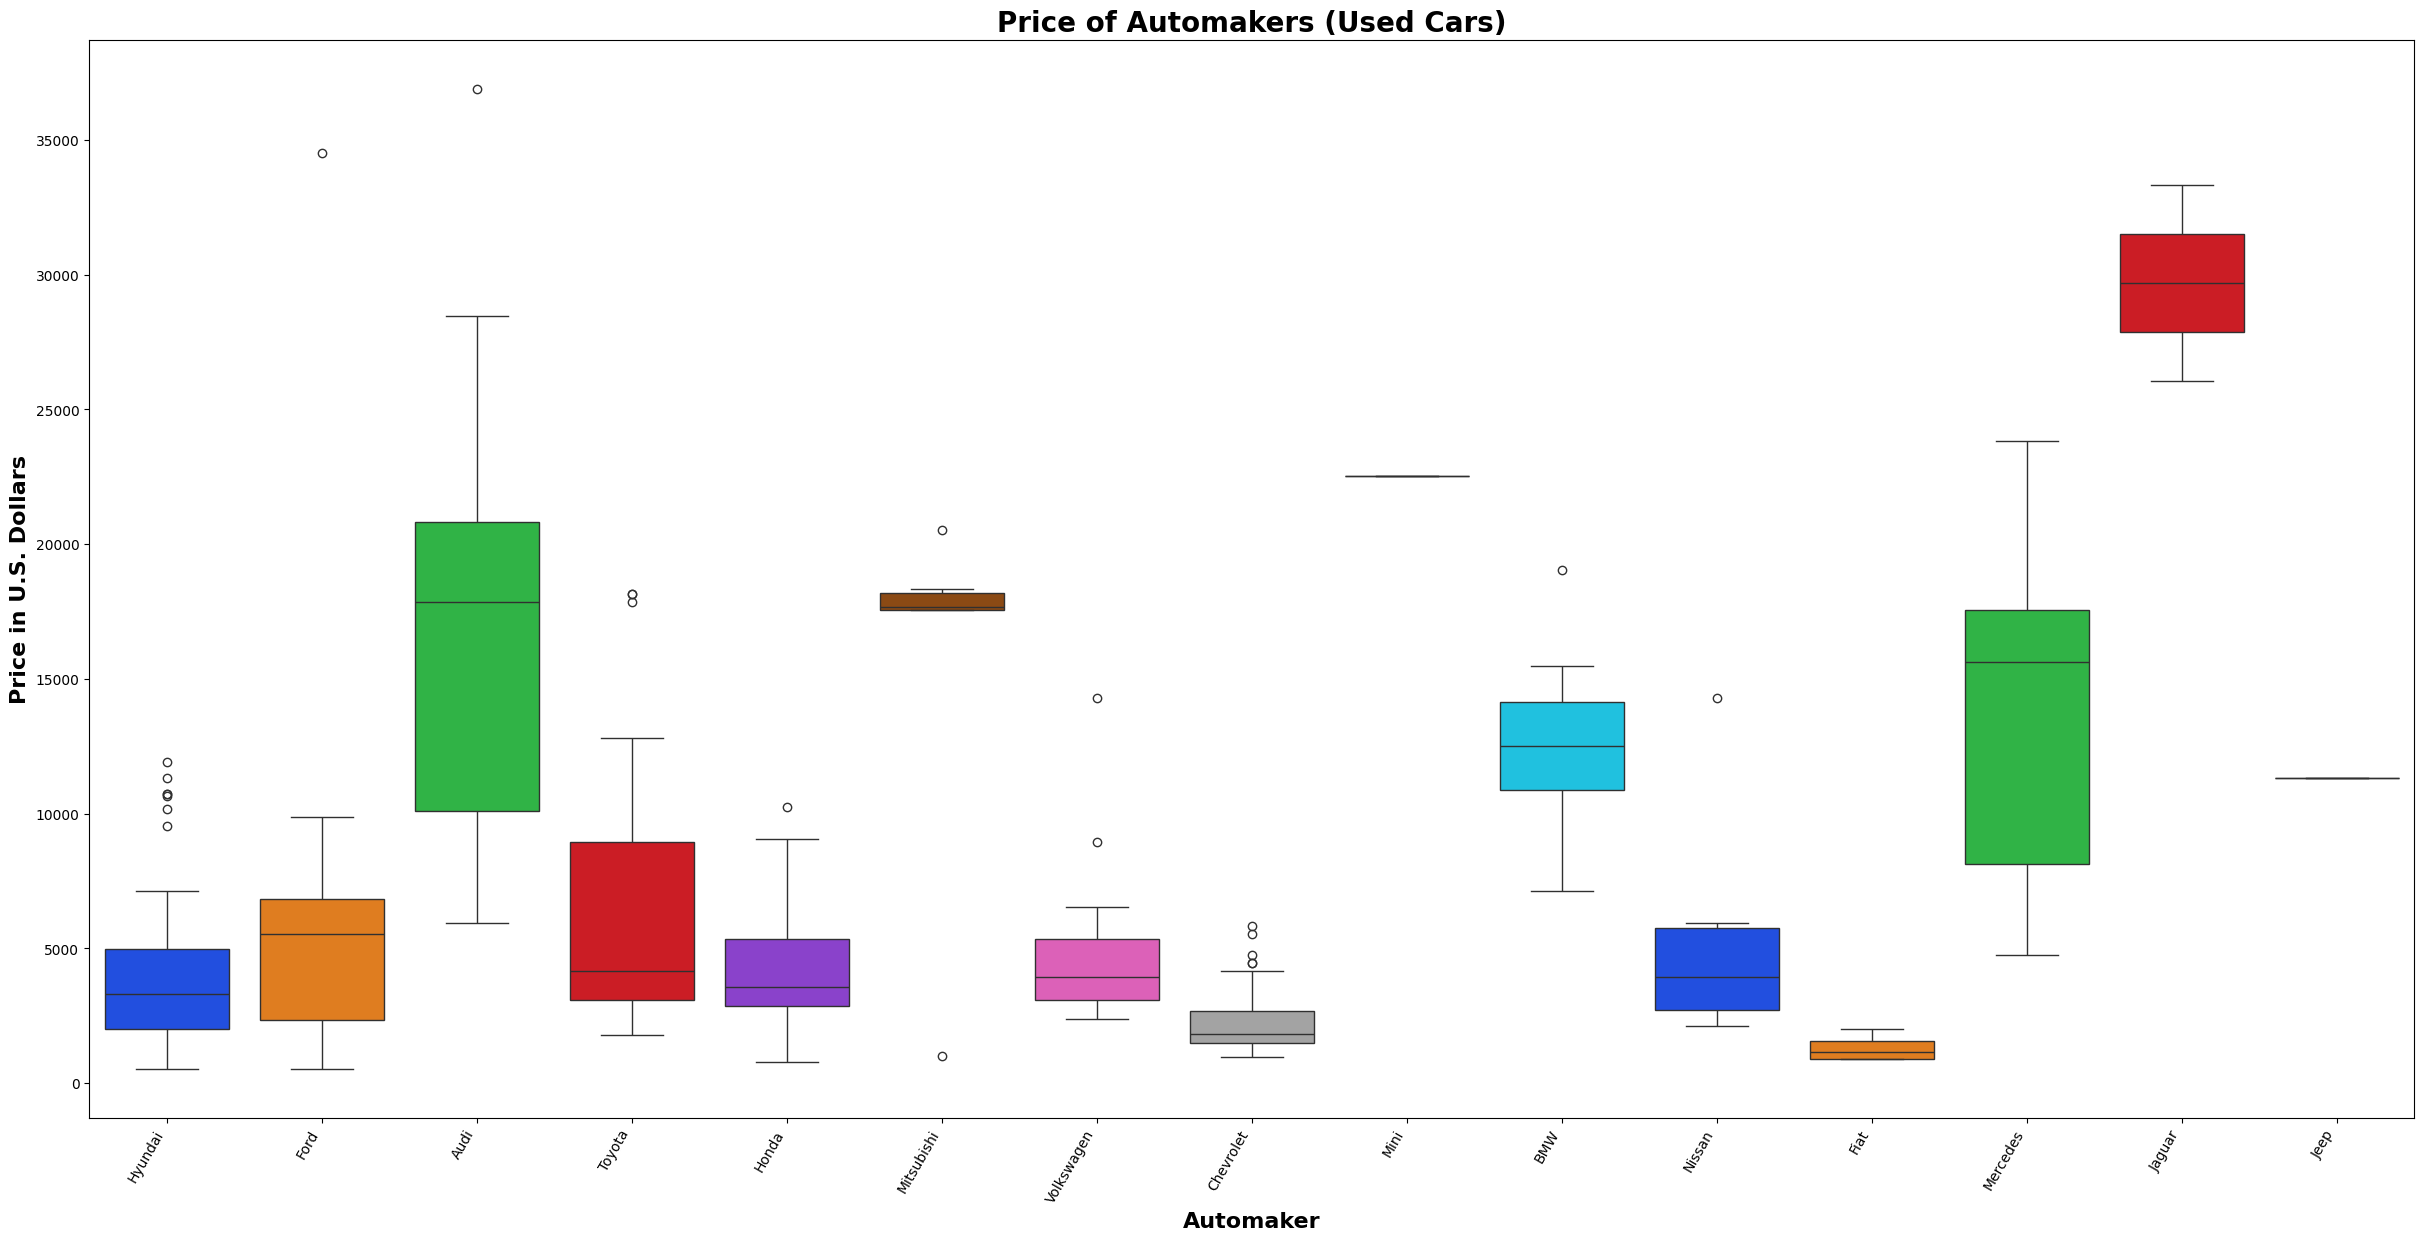

In [209]:
plt.subplots(figsize=(30,14))

ax=sns.boxplot(x='automaker', y='price', data=df_filtered, hue ='automaker', palette = 'bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, ha='right')

# Set y-axis to start from the minimum value in the 'price' column
# ax.set_ylim(ymin=float(df_filtered['price'].min()))

#titles
ax.set_title('Price of Automakers (Used Cars)', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Automaker', fontsize=16, weight= 'bold')
plt.show()

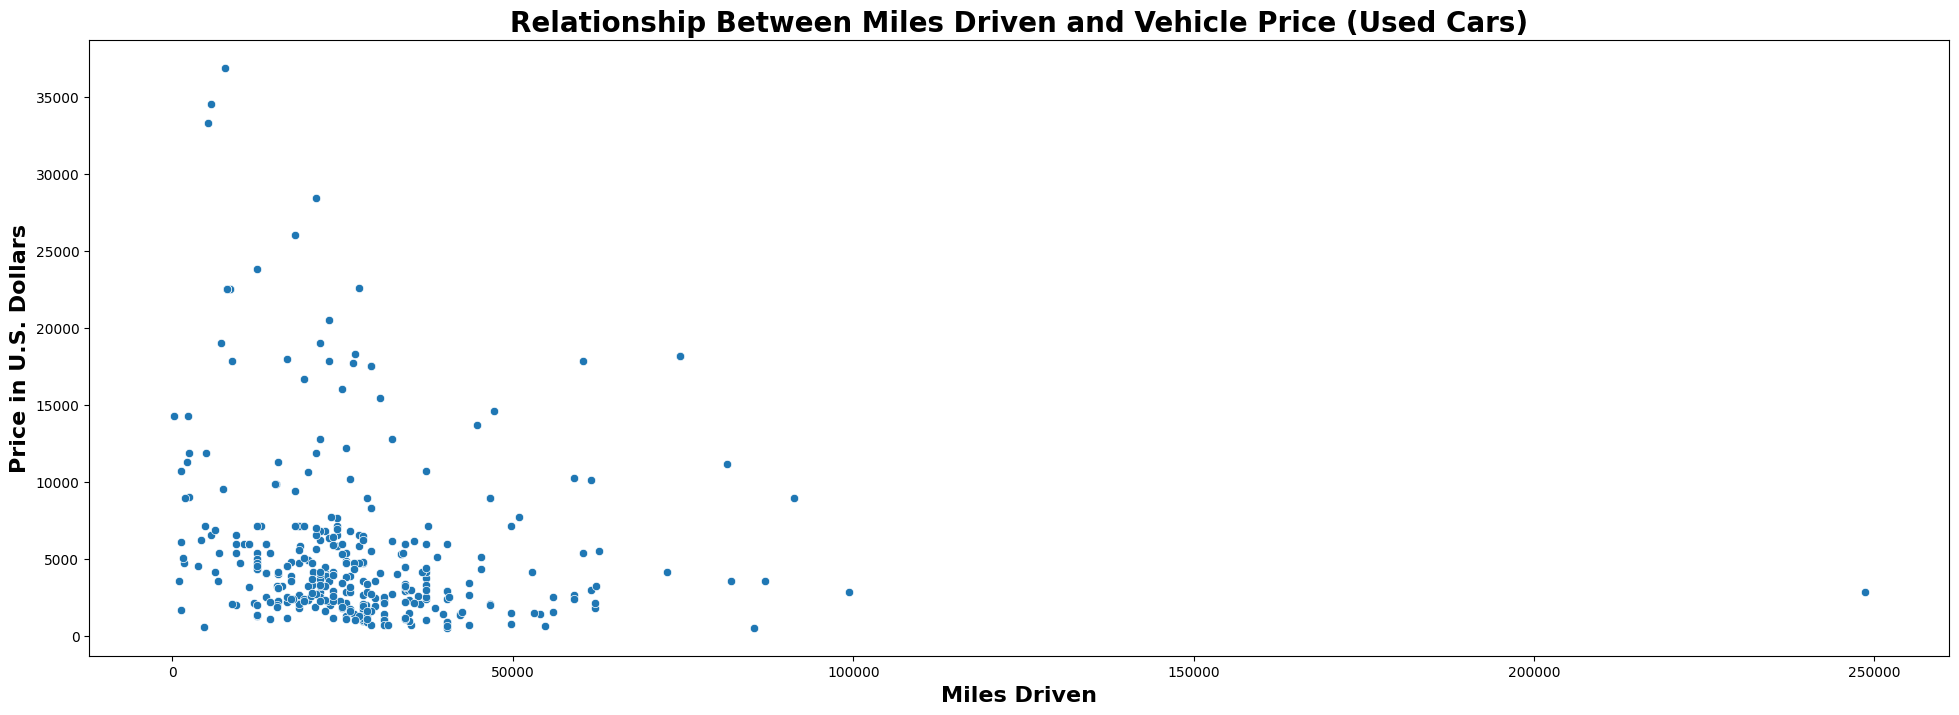

In [210]:
plt.subplots(figsize=(24,8))

ax = sns.scatterplot(x='miles_driven',y='price',data=df_filtered,)

#titles
ax.set_title('Relationship Between Miles Driven and Vehicle Price (Used Cars)', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Miles Driven', fontsize=16, weight= 'bold')
plt.show()


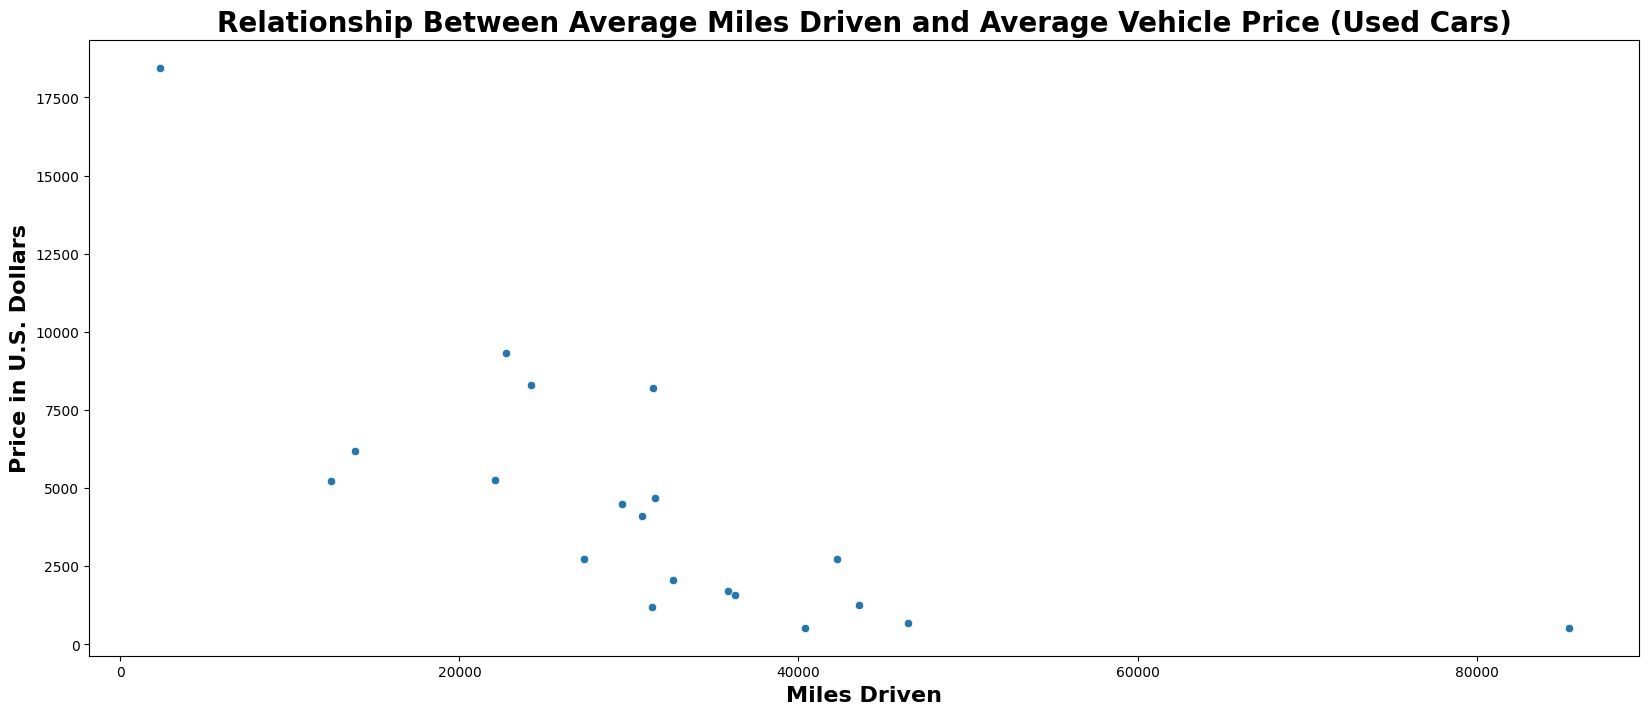

In [211]:
plt.subplots(figsize=(20,8))

ax = sns.scatterplot(x='average_miles',y='average_price',data=average_miles_YOY_df,)

#titles
ax.set_title('Relationship Between Average Miles Driven and Average Vehicle Price (Used Cars)', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Miles Driven', fontsize=16, weight= 'bold')


plt.show()

Text(0.5, 0, 'Fuel Type')

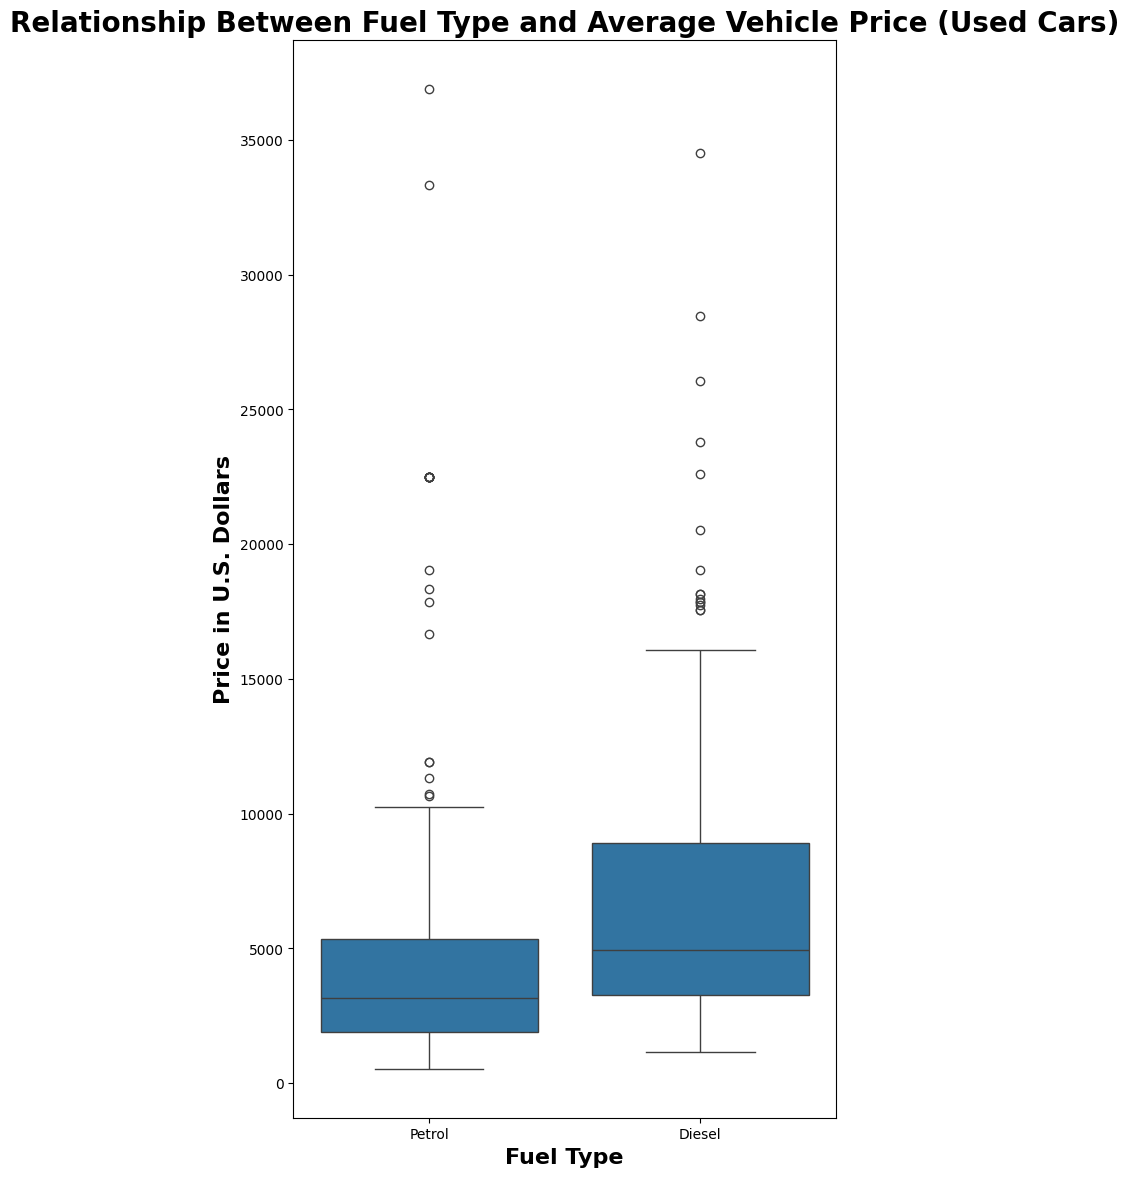

In [212]:
plt.subplots(figsize=(7,14))
ax = sns.boxplot(x='fuel_type', y='price', data=df_filtered)

#titles
ax.set_title('Relationship Between Fuel Type and Average Vehicle Price (Used Cars)', fontsize=20, weight= 'bold')
ax.set_ylabel('Price in U.S. Dollars', fontsize=16, weight= 'bold')
ax.set_xlabel('Fuel Type', fontsize=16, weight= 'bold')

/var/folders/9c/m3vt97qn6knb2pyk590vl0th0000gn/T/ipykernel_2046/1771698578.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation= 60)


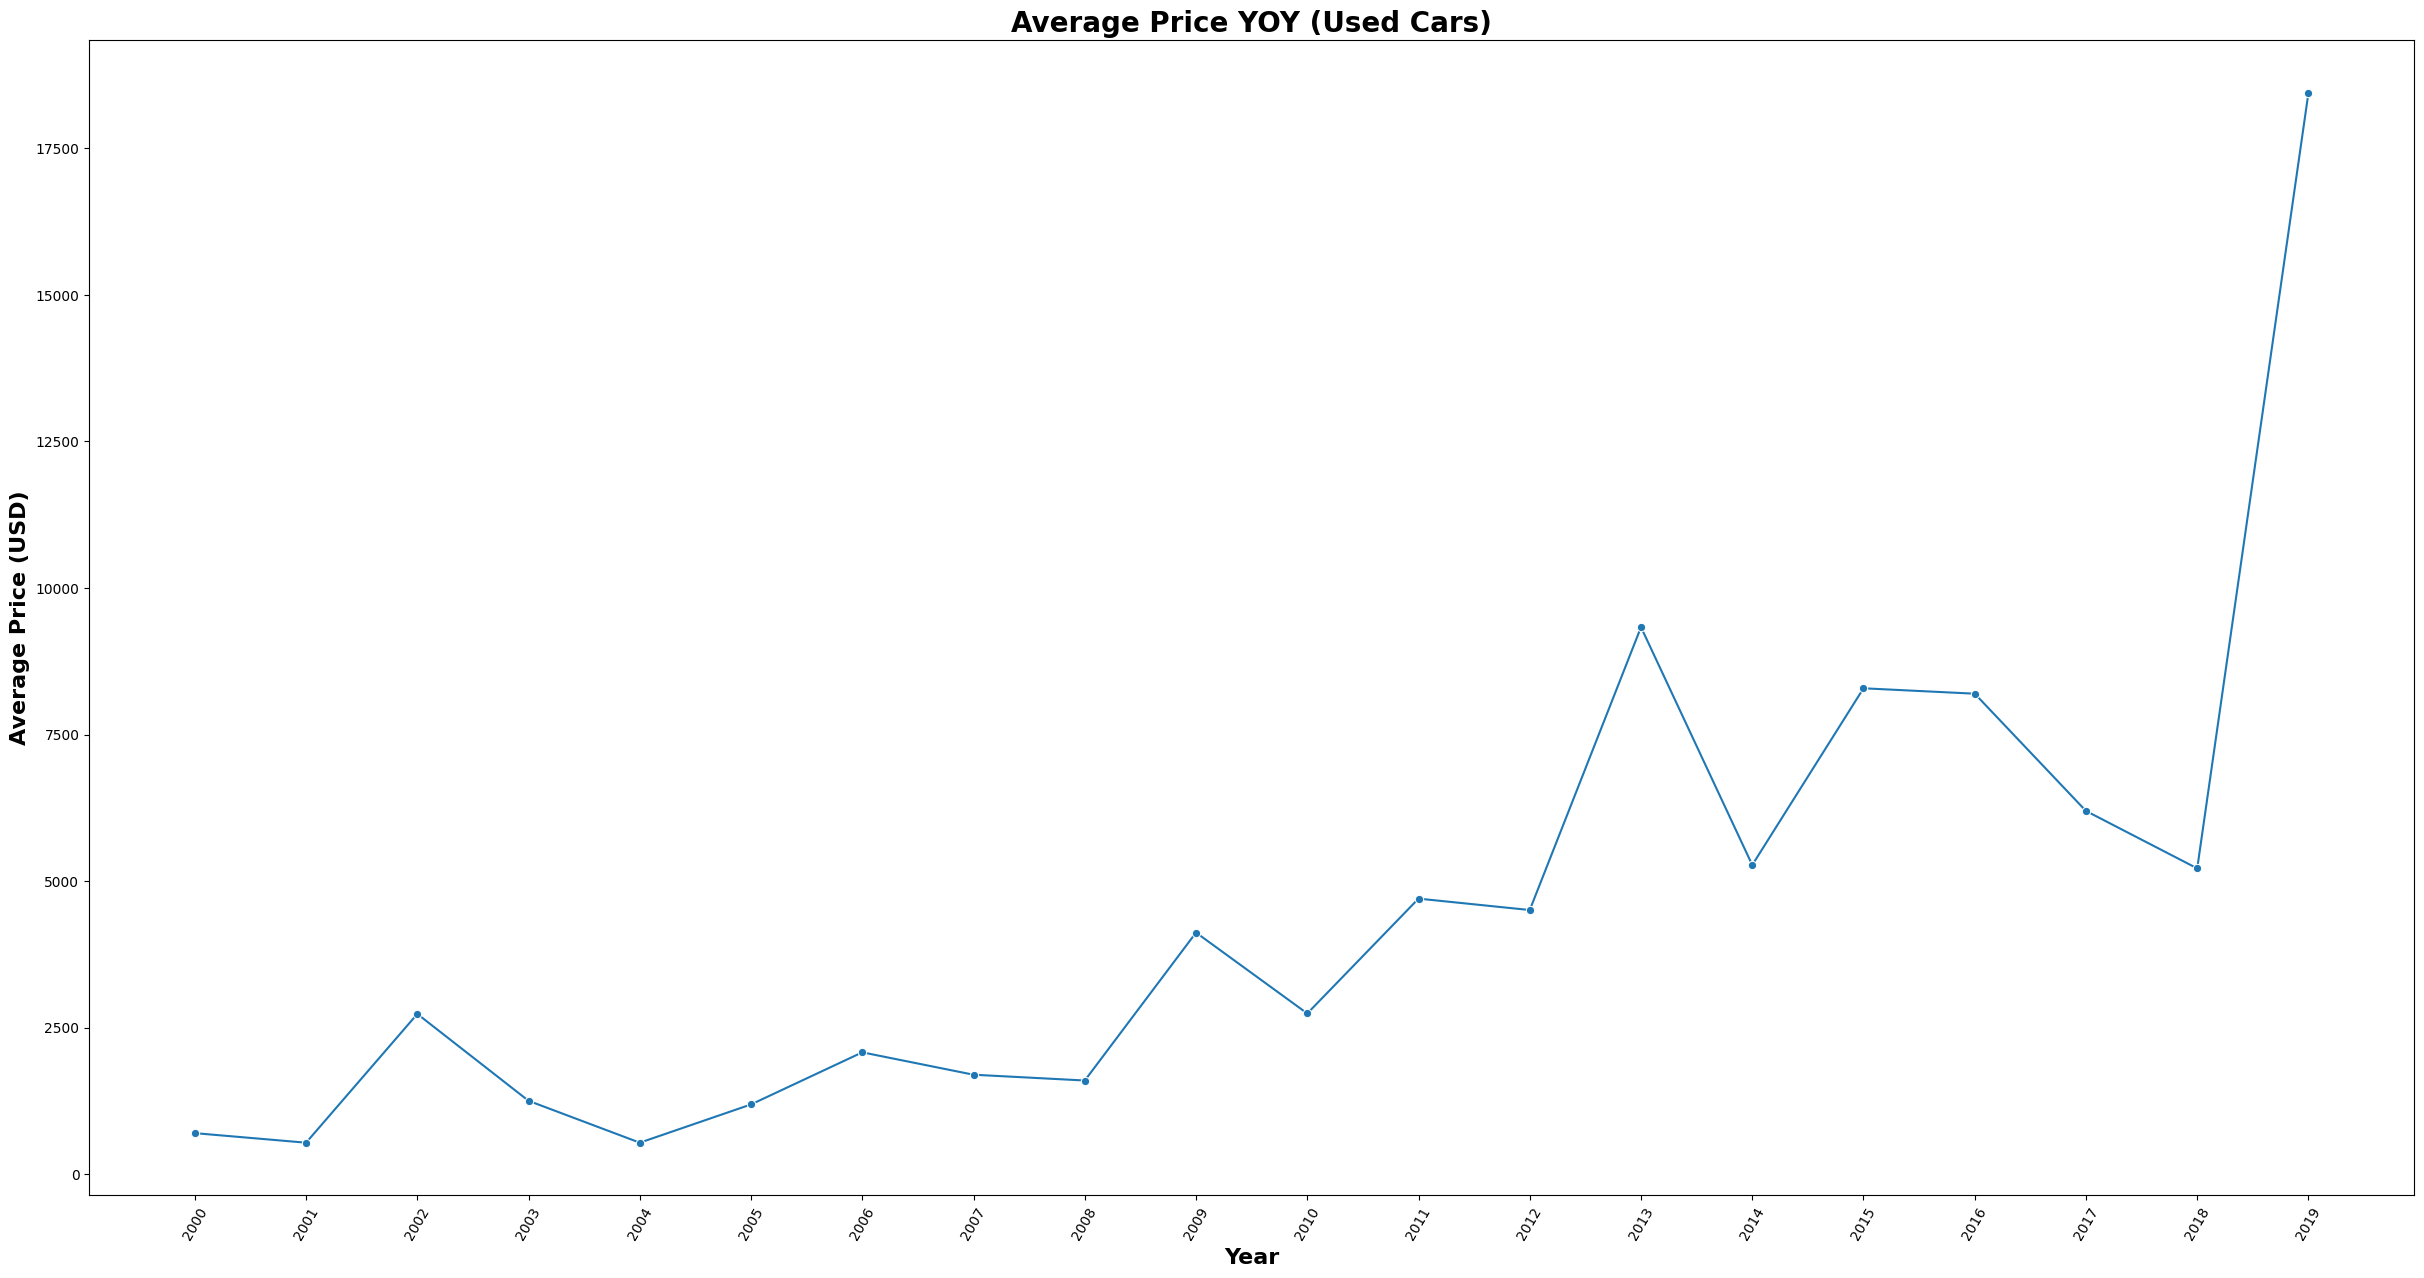

In [213]:
import matplotlib.ticker as ticker

# Create a line plot using Seaborn
plt.subplots(figsize=(30,15))
# plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='year', y='average_price', data=average_price_YOY_df, marker='o')
ax.set_xticklabels(ax.get_xticklabels(), rotation= 60)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

#titles
ax.set_title('Average Price YOY (Used Cars)', fontsize=20, weight= 'bold')
ax.set_ylabel('Average Price (USD)', fontsize=16, weight= 'bold')
ax.set_xlabel('Year', fontsize=16, weight= 'bold')


# plt.gca().axes.get_yaxis().set_visible(False)

plt.show()